In [ ]:
# ResNet50 pretrained model
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import decode_predictions
from keras.applications.resnet50 import preprocess_input

from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
from os import listdir

ModuleNotFoundError: ignored

In [ ]:
img_width, img_height = 224, 224

model_pretrained = ResNet50(weights='imagenet',
                      include_top=True,
                      input_shape=(img_height, img_width, 3))


102973440/102967424 [==============================] - 2s 0us/step


In [ ]:
model_pretrained.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

(224, 224, 3)
(1, 224, 224, 3)


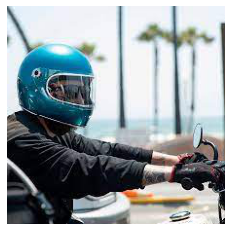

In [ ]:
# Insert correct path of your image below
img_path = '/content/sample_data/h3.jpg'

img = image.load_img(img_path, target_size=(img_width, img_height))
img_data = image.img_to_array(img)
print(img_data.shape)
#To convert images from 3D to 4D
img_data = np.expand_dims(img_data, axis=0)
#check dimension
print(img_data.shape)
img_data = preprocess_input(img_data)
#predict the result
pred = model_pretrained.predict(img_data,verbose=0)
# decode the results into a list of tuples (class, description, probability)
label = decode_predictions(pred)
label = label[0][0]

plt.imshow(img)
plt.axis('off')
plt.show()


In [ ]:
print(label)

('n03127747', 'crash_helmet', 0.38845387)


('n03127747', 'crash_helmet', 0.38845387)


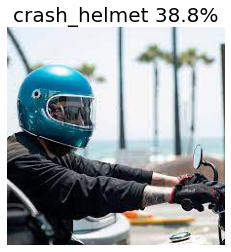

Predicted: [('n03127747', 'crash_helmet', 0.38845387), ('n03791053', 'motor_scooter', 0.30934113), ('n03785016', 'moped', 0.26769403)]


In [ ]:
print(label)
plt.imshow(img)
stringprint ="%.1f" % round(label[2]*100,1)
plt.title(label[1] + " " + str(stringprint) + "%", fontsize=20)
plt.axis('off')
plt.show()
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(pred, top=3)[0])


In [ ]:
#folder_path = '/content/drive/My Drive/My ML Project /DL Project/Transfer Learning/images/'
folder_path = '/content/sample_data/images'
images = os.listdir(folder_path)
print(images)
fig = plt.figure(figsize=(16,20))
i=0
rows=4
columns=4

for image1 in images:
    i+=1
    img = image.load_img(folder_path+image1, target_size=(img_width, img_height))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    pred = model_pretrained.predict(img_data,verbose=0)
    label = decode_predictions(pred)
    label = label[0][0]
    fig.add_subplot(rows,columns,i)
    fig.subplots_adjust(hspace=.5)
    plt.imsho
    plt.imshow(img)
    stringprint ="%.1f" % round(label[2]*100,1)
    plt.title(label[1] + " " + str(stringprint) + "%", fontsize=20)
    plt.axis('off')
    plt.show()

[]


<Figure size 1152x1440 with 0 Axes>